# Demo of Ch3. Non-Linear Classifier
----
This is the sample code of TU-ETP-AD1062 Machine Learning Fundamentals.

For more information, please refer to:
https://sites.google.com/view/tu-ad1062-mlfundamentals/

In [2]:
import numpy as np
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.svm
import sklearn.neural_network
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from mlfund.dataset import Gaussian
from mlfund.dataset import GaussianParam
from mlfund.plot import Plot2D

%matplotlib inline

## Demo 1. Generate random dataset in 2-Dimension
----
The demo here generate two groups of 2-dimension data which are normally distributed as following:
1. Generate 200 training data `X_train`, with corresponded label `y_train`
2. Generate 100 testing data `X_test`, with corresponded label `y_test`

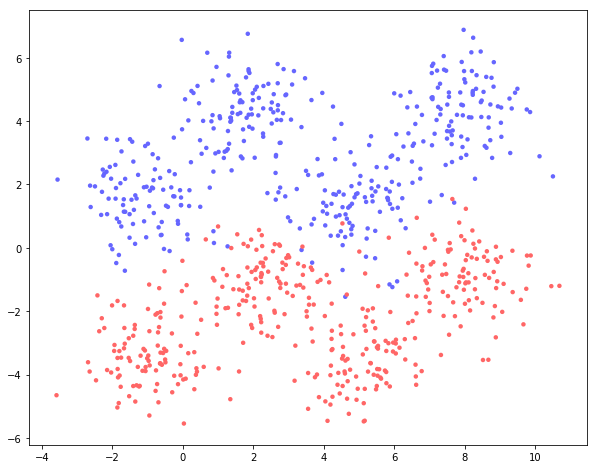

In [47]:
# Generate Training data and plot it
np.random.seed(0)

params_train = []

param = GaussianParam()
param.mean = [-1, 1.5]
param.cov = [[1, 0], [0, 1]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [2, 4.5]
param.cov = [[1, 0], [0, 1]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [5, 1.5]
param.cov = [[1, 0], [0, 1]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [8, 4.5]
param.cov = [[1, 0], [0, 1]]
param.N = 100
params_train.append(param)


param = GaussianParam()
param.mean = [-1, -3.5]
param.cov = [[1, 0], [0, 1]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [2, -1]
param.cov = [[1, 0], [0, 1]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [5, -3.5]
param.cov = [[1, 0], [0, 1]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [8, -1]
param.cov = [[1, 0], [0, 1]]
param.N = 100
params_train.append(param)


X_train, y_train = Gaussian.generate(params_train)
y_train[0:400] = 1
y_train[400:800] = 2

plot = Plot2D()
plot.scatter(X_train, y_train)
plot.show()

In [48]:
# Generate testing data
params_test = []

param = GaussianParam()
param.mean = [-0.1, 2.5]
param.cov = [[1, 5], [0, 1]]
param.N = 50
params_test.append(param)

param = GaussianParam()
param.mean = [0.1, -2.5]
param.cov = [[1, 5], [0, 1]]
param.N = 50
params_test.append(param)

X_test, y_test = Gaussian.generate(params_test)

## Demo 2. Multi-Layer Perceptron (MLP)
----
The demo here trains the model by Perceptron algorithm with `X_train`, then predict the testing data by `X_test`

Training data:


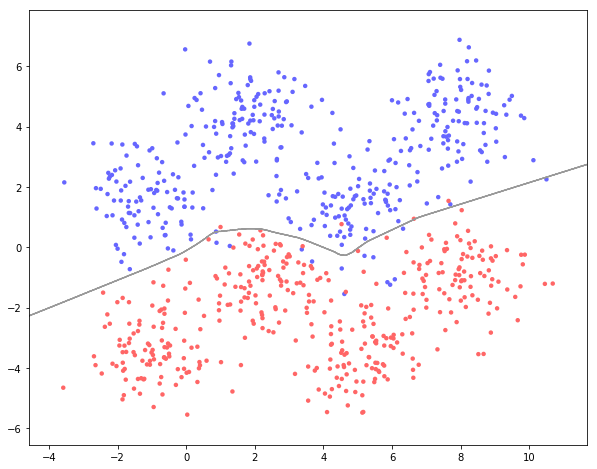

Testing data:
MCE = 0.100


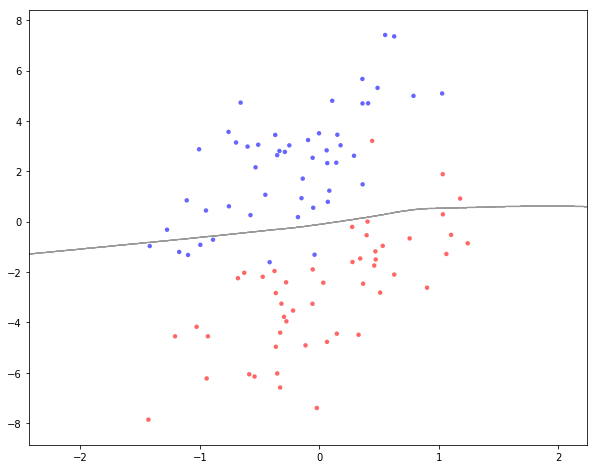

In [84]:
clfMLP = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=(100,100),
    max_iter=1000,
    tol=1e-8
)
clfMLP.fit(X_train, y_train)

y_test_predict = clfMLP.predict(X_test)

print("Training data:")
plot = Plot2D()
plot.scatter(X_train, y_train)
plot.classifierContour(X_train, y_train, clfMLP)
plot.show()

print("Testing data:")
print("MCE = %2.3f" % sklearn.metrics.zero_one_loss(y_test, y_test_predict))
plot = Plot2D()
plot.scatter(X_test, y_test)
plot.classifierContour(X_test, y_test, clfMLP)
plot.show()

## Demo 3. c-Support Vector Machine (c-SVC)
----
The demo here trains the model by SVM with `X_train`, then predict the testing data by `X_test`
Notice that:
1. The number of support vectors is output via the attribute of `clfSVC.support_vectors_`
2. The support vectors are drawn via the wrapped function `mlfund.scatterSV`

Training data:
#SV = 115


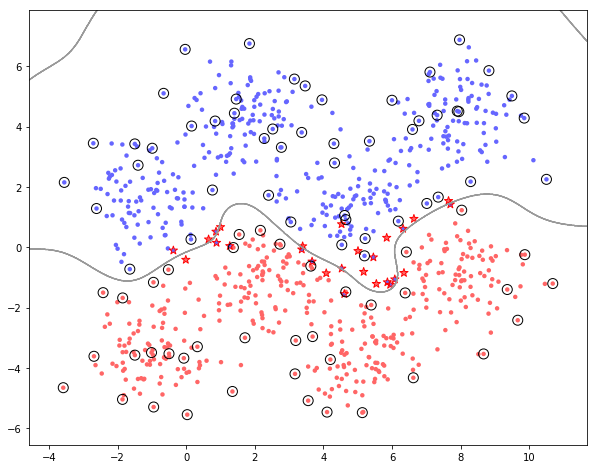

Testing data:
MCE = 0.070


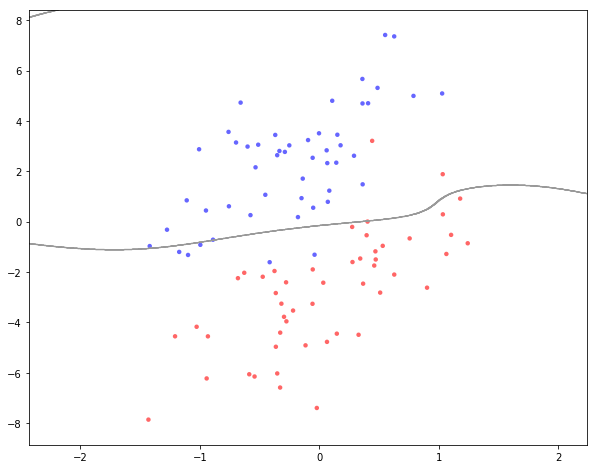

In [95]:
clfSVC = sklearn.svm.SVC(C=10, kernel='rbf')
clfSVC.fit(X_train, y_train)

y_test_predict = clfSVC.predict(X_test)

print("Training data:")
print("#SV = %d" % len(clfSVC.support_vectors_))
plot = Plot2D()
plot.scatter(X_train, y_train)
plot.scatterCSVC(clfSVC)
plot.classifierContour(X_train, y_train, clfSVC)
plot.show()

print("Testing data:")
print("MCE = %2.3f" % sklearn.metrics.zero_one_loss(y_test, y_test_predict))
plot = Plot2D()
plot.scatter(X_test, y_test)
plot.classifierContour(X_test, y_test, clfSVC)
plot.show()

## Demo 4. Support Vector Machine - More "crowded" case
----
The demo here use the same settings of the c-SVM model, but learning from a more crowded data. One could adjust the value of `C` to observe the support vectors being relaxed by slack variables
* The larger `C`, the less support vectors (due to the more penalty of $\xi_i$), but the smaller margin size
* The smaller `C`, the more support vectors (due to the less penalty of $\xi_i$), but the larger margin size

In [ ]:
# Generate Training data and plot it
np.random.seed(0)

params_train = []

param = GaussianParam()
param.mean = [-0.3, 2]
param.cov = [[1, 5], [0, 1]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [0.3, -2]
param.cov = [[1, 5], [0, 1]]
param.N = 100
params_train.append(param)

X_train, y_train = Gaussian.generate(params_train)

# Generate testing data
params_test = []

param = GaussianParam()
param.mean = [-0.3, 2]
param.cov = [[1, 5], [0, 1]]
param.N = 50
params_test.append(param)

param = GaussianParam()
param.mean = [0.3, -2]
param.cov = [[1, 5], [0, 1]]
param.N = 50
params_test.append(param)

X_test, y_test = Gaussian.generate(params_test)

# Try different settings here!
# clfSVC = sklearn.svm.SVC(C=0.1, kernel='linear')
# clfSVC = sklearn.svm.SVC(C=1, kernel='linear')
# clfSVC = sklearn.svm.SVC(C=10, kernel='linear')
# clfSVC = sklearn.svm.SVC(C=100, kernel='linear')
# clfSVC = sklearn.svm.SVC(C=1000, kernel='linear')
# ...

clfSVC = sklearn.svm.SVC(C=0.1, kernel='linear')
clfSVC.fit(X_train, y_train)

y_test_predict = clfSVC.predict(X_test)

print("Training data:")
print("#SV = %d" % len(clfSVC.support_vectors_))
plot = Plot2D()
plot.scatter(X_train, y_train)
plot.scatterCSVC(clfSVC)
plot.classifierContour(X_train, y_train, clfSVC)
plot.show()

print("Testing data:")
print("MCE = %2.3f" % sklearn.metrics.zero_one_loss(y_test, y_test_predict))
plot = Plot2D()
plot.scatter(X_test, y_test)
plot.classifierContour(X_test, y_test, clfSVC)
plot.show()

print(clfSVC.decision_function)
